# Debt data - file investigation overtime

In [2]:
from  esma_data_py import EsmaDataLoader

# instantiate edl
edl = EsmaDataLoader()

# load available mifid file list
list_files = edl.load_mifid_file_list()

2025-08-12 08:09:49,703 - EsmaDataLoader - INFO - Loading 3 datasets
2025-08-12 08:09:49,706 - EsmaDataLoader - INFO - Loading dvcap dataset
2025-08-12 08:09:49,708 - EsmaDataLoader - INFO - Requesting dvcap files
2025-08-12 08:09:49,838 - EsmaDataLoader - INFO - Request successful, parsing response
2025-08-12 08:09:49,909 - EsmaDataLoader - INFO - Loading fitrs dataset
2025-08-12 08:09:49,912 - EsmaDataLoader - INFO - Requesting fitrs files
2025-08-12 08:09:50,952 - EsmaDataLoader - INFO - Request successful, parsing response
2025-08-12 08:10:01,899 - EsmaDataLoader - INFO - Loading firds dataset
2025-08-12 08:10:01,901 - EsmaDataLoader - INFO - Requesting firds files
2025-08-12 08:10:02,884 - EsmaDataLoader - INFO - Request successful, parsing response
2025-08-12 08:10:15,514 - EsmaDataLoader - INFO - Process done!


In [3]:
list_bond_file = list(
    list_files
 .loc[lambda x: x['download_link'].str.contains("fitrs")]
 .loc[lambda x: x['file_name'].str.contains("_D_")]
 .loc[lambda x: x['file_name'].str.contains("1of")]
 .loc[lambda x: x['creation_date'] >= "2024-01-01"]
 .iloc[::20]
 .reset_index(drop=True)
 ['download_link']
)

In [4]:
list_bond_file

['https://fitrs.esma.europa.eu/fitrs/FULNCR_20250809_D_1of5.zip',
 'https://fitrs.esma.europa.eu/fitrs/FULNCR_20250322_D_1of5.zip',
 'https://fitrs.esma.europa.eu/fitrs/FULNCR_20241102_D_1of6.zip',
 'https://fitrs.esma.europa.eu/fitrs/FULNCR_20240615_D_1of6.zip',
 'https://fitrs.esma.europa.eu/fitrs/FULNCR_20240217_D_1of5.zip']

In [12]:
from tqdm import trange
list_df = []
for f in trange(len(list_bond_file)):
    file = list_bond_file[f]
    df = edl.download_file(file).assign(file = file)
    list_df += [df]

 20%|██        | 1/5 [00:04<00:18,  4.56s/it]2025-08-12 08:32:23,096 - EsmaDataUtils - WARNING - Previously saved data used:
/home/onyxia/esma_data_py/data/8616880831fbeb645609e051cef8b33d.csv
Set update=True to get the most up-to-date data
2025-08-12 08:32:23,096 - EsmaDataUtils - WARNING - Previously saved data used:
/home/onyxia/esma_data_py/data/8616880831fbeb645609e051cef8b33d.csv
Set update=True to get the most up-to-date data
2025-08-12 08:32:23,096 - EsmaDataUtils - WARNING - Previously saved data used:
/home/onyxia/esma_data_py/data/8616880831fbeb645609e051cef8b33d.csv
Set update=True to get the most up-to-date data
2025-08-12 08:32:23,096 - EsmaDataUtils - WARNING - Previously saved data used:
/home/onyxia/esma_data_py/data/8616880831fbeb645609e051cef8b33d.csv
Set update=True to get the most up-to-date data
2025-08-12 08:32:23,096 - EsmaDataUtils - WARNING - Previously saved data used:
/home/onyxia/esma_data_py/data/8616880831fbeb645609e051cef8b33d.csv
Set update=True to get 

In [34]:
import pandas as pd
data = pd.concat(list_df)

In [14]:
data.to_csv("bonds.csv")

In [37]:
list_cols = ["PstTradLrgInScaleThrshld_Amt", "PstTradInstrmSzSpcfcThrshld_Amt", "Lqdty", "file"]

stat = (data[list_cols]
 .value_counts()
 .reset_index(drop=False)
 .assign(file = lambda x: x['file'].apply(
     lambda a: a.replace("https://fitrs.esma.europa.eu/fitrs/FULNCR_", "")[:8]))
)

In [26]:
stat.to_csv("stat.csv")

In [38]:
stat["PstTradLrgInScaleThrshld_Amt"] = "PstTradLrgInScaleThrshld_Amt: " + stat["PstTradLrgInScaleThrshld_Amt"] 
stat["PstTradInstrmSzSpcfcThrshld_Amt"] = "PstTradInstrmSzSpcfcThrshld_Amt: " + stat["PstTradInstrmSzSpcfcThrshld_Amt"] 
stat["Lqdty"] = "Lqdty: " + stat["Lqdty"] 
stat["Category"] = (stat["PstTradLrgInScaleThrshld_Amt"] + ' / ' +  
                    stat["PstTradInstrmSzSpcfcThrshld_Amt"] + ' / ' + 
                    stat["Lqdty"]
                   )

In [39]:
stat

,PstTradLrgInScaleThrshld_Amt,PstTradInstrmSzSpcfcThrshld_Amt,Lqdty,file,count,Category
0,PstTradLrgInScaleThrshld_Amt: 100000,PstTradInstrmSzSpcfcThrshld_Amt: 90000,Lqdty: true,20240615,164544,PstTradLrgInScaleThrshld_Amt: 100000 / PstTrad...
1,PstTradLrgInScaleThrshld_Amt: 100000,PstTradInstrmSzSpcfcThrshld_Amt: 90000,Lqdty: true,20240217,158544,PstTradLrgInScaleThrshld_Amt: 100000 / PstTrad...
2,PstTradLrgInScaleThrshld_Amt: 100000,PstTradInstrmSzSpcfcThrshld_Amt: 90000,Lqdty: true,20241102,103005,PstTradLrgInScaleThrshld_Amt: 100000 / PstTrad...
3,PstTradLrgInScaleThrshld_Amt: 100000,PstTradInstrmSzSpcfcThrshld_Amt: 90000,Lqdty: true,20250322,68093,PstTradLrgInScaleThrshld_Amt: 100000 / PstTrad...
4,PstTradLrgInScaleThrshld_Amt: 100000,PstTradInstrmSzSpcfcThrshld_Amt: 90000,Lqdty: true,20250809,52586,PstTradLrgInScaleThrshld_Amt: 100000 / PstTrad...
5,PstTradLrgInScaleThrshld_Amt: 1000000,PstTradInstrmSzSpcfcThrshld_Amt: 500000,Lqdty: false,20240217,8506,PstTradLrgInScaleThrshld_Amt: 1000000 / PstTra...
6,PstTradLrgInScaleThrshld_Amt: 1000000,PstTradInstrmSzSpcfcThrshld_Amt: 500000,Lqdty: false,20240615,5468,PstTradLrgInScaleThrshld_Amt: 1000000 / PstTra...
7,PstTradLrgInScaleThrshld_Amt: 1000000,PstTradInstrmSzSpcfcThrshld_Amt: 500000,Lqdty: false,20241102,3750,PstTradLrgInScaleThrshld_Amt: 1000000 / PstTra...
8,PstTradLrgInScaleThrshld_Amt: 1000000,PstTradInstrmSzSpcfcThrshld_Amt: 500000,Lqdty: false,20250322,2821,PstTradLrgInScaleThrshld_Amt: 1000000 / PstTra...
9,PstTradLrgInScaleThrshld_Amt: 1000000,PstTradInstrmSzSpcfcThrshld_Amt: 500000,Lqdty: false,20250809,2809,PstTradLrgInScaleThrshld_Amt: 1000000 / PstTra...


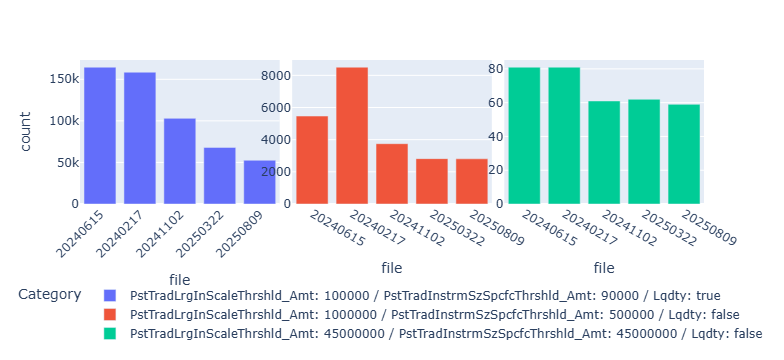

In [46]:
import plotly.express as px

fig = px.bar(stat, x="file", y="count",
             color="Category", facet_col="Category",
            facet_col_wrap=3)
fig.update_layout(
    # barmode='sta 
    xaxis_tickangle=-45,
    legend=dict(
        orientation="h",      # horizontal legend
        yanchor="bottom",
        y=-1,               # move below plot
        xanchor="center",
        x=0.5
    )
)
fig.update_yaxes(matches=None, showticklabels = True)
for anno in fig['layout']['annotations']:
    anno['text']=''
fig.show()